In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm

In [20]:
stock = yf.download('^NSEI')
stock

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0
...,...,...,...,...,...,...
2024-01-29,21433.099609,21763.250000,21429.599609,21737.599609,21737.599609,376700
2024-01-30,21775.750000,21813.050781,21501.800781,21522.099609,21522.099609,375100
2024-01-31,21487.250000,21741.349609,21448.849609,21725.699219,21725.699219,410600


In [21]:
log_returns = np.log(1+stock['Adj Close'].pct_change())
mean = log_returns.mean()
var = log_returns.var()
drift = mean - (0.5*var)  # random drift parameter (Will improve this further)
drift

0.00030269954306303673

In [22]:
std = log_returns.std()
days = 50
trials = 1000
Z = norm.ppf(np.random.rand(days, trials))
daily_ret = np.exp(np.array(drift)+np.array(std)*Z)

<function matplotlib.pyplot.show(close=None, block=None)>

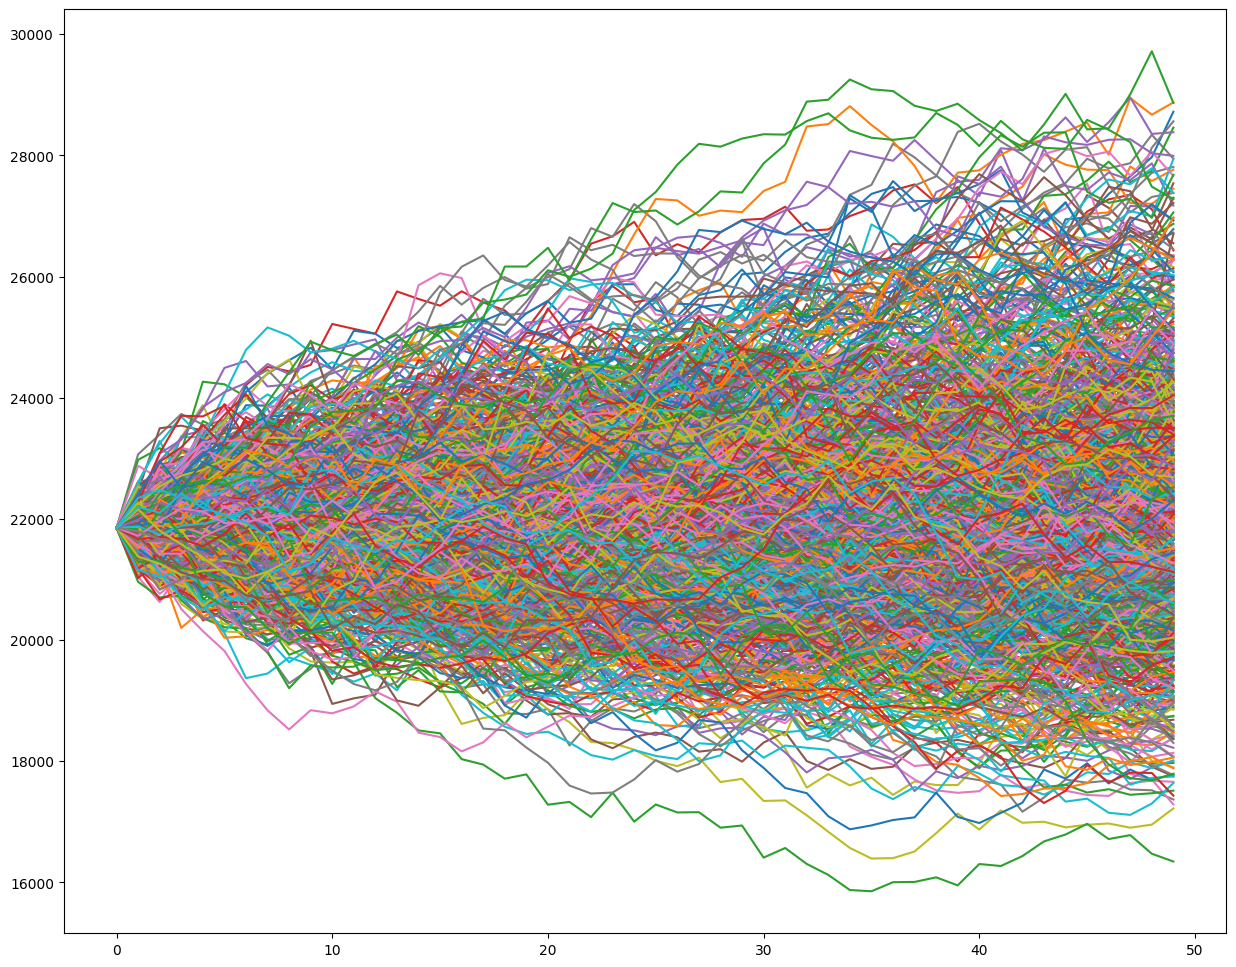

In [23]:
price_paths = np.zeros_like(daily_ret)
price_paths[0] = stock['Adj Close'].iloc[-1]
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*daily_ret[t]
plt.figure(figsize=[15, 12])
plt.plot(price_paths)
plt.show